## Importing necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

## A. Model Building

In [2]:
inputs = Input((1,))
layer1 = Dense(32, activation = "relu", name="First_Hidden_Layer")(inputs)
layer2 = Dense(64, activation = "relu", name="Second_Hidden_Layer")(layer1)
layer3 = Dense(128, activation = "relu", name="Third_Hidden_Layer")(layer2)
outputs = Dense(1, name = 'Output_Layer')(layer3)

model = Model(inputs, outputs, name = 'DNN_to_solve_polynomial')
model.summary()

Model: "DNN_to_solve_polynomial"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 First_Hidden_Layer (Dense)  (None, 32)                64        
                                                                 
 Second_Hidden_Layer (Dense  (None, 64)                2112      
 )                                                               
                                                                 
 Third_Hidden_Layer (Dense)  (None, 128)               8320      
                                                                 
 Output_Layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_______

In [3]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.R2Score(name='accuracy')])

## B. Dataset Creation

In [4]:
def normalize(input_arr):
  h = np.max(input_arr)
  l = np.min(input_arr)
  output_arr = (2*(input_arr-l)/(h-l))-1
  return output_arr

In [5]:
# taking 20000 random floating point value between -20 and 20
x = np.random.randint(-20, 20, 20000)
y = 5*(x**3) - 8*(x**2) - 7*x + 1

# normalizing x and y
x_norm = normalize(x)
y_norm = normalize(y)

## C. Splitting Dataset

In [6]:
X_train, X_test_val, y_train, y_test_val = train_test_split(x_norm, y_norm, test_size=0.1)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")
print(f"X_val shape : {X_val.shape}")
print(f"y_val shape : {y_val.shape}")

X_train shape : (18000,)
y_train shape : (18000,)
X_test shape : (1000,)
y_test shape : (1000,)
X_val shape : (1000,)
y_val shape : (1000,)


## C. Training

In [7]:
trained_model = model.fit(X_train, y_train, epochs = 50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
563/563 [==============================] - 6s 7ms/step - loss: 0.0057 - accuracy: 0.9654 - val_loss: 2.8877e-05 - val_accuracy: 0.9998
Epoch 2/50
563/563 [==============================] - 2s 4ms/step - loss: 1.6109e-05 - accuracy: 0.9999 - val_loss: 4.0847e-06 - val_accuracy: 1.0000
Epoch 3/50
563/563 [==============================] - 3s 6ms/step - loss: 5.8701e-06 - accuracy: 1.0000 - val_loss: 1.3989e-05 - val_accuracy: 0.9999
Epoch 4/50
563/563 [==============================] - 3s 4ms/step - loss: 9.8892e-06 - accuracy: 0.9999 - val_loss: 2.1464e-06 - val_accuracy: 1.0000
Epoch 5/50
563/563 [==============================] - 4s 7ms/step - loss: 3.4419e-05 - accuracy: 0.9998 - val_loss: 3.5656e-06 - val_accuracy: 1.0000
Epoch 6/50
563/563 [==============================] - 2s 4ms/step - loss: 3.7186e-06 - accuracy: 1.0000 - val_loss: 5.1194e-06 - val_accuracy: 1.0000
Epoch 7/50
563/563 [==============================] - 1s 2ms/step - loss: 5.0978e-05 - accuracy: 0.9997 

In [8]:
history = trained_model.history

## D. Plotting Accuracy and Loss

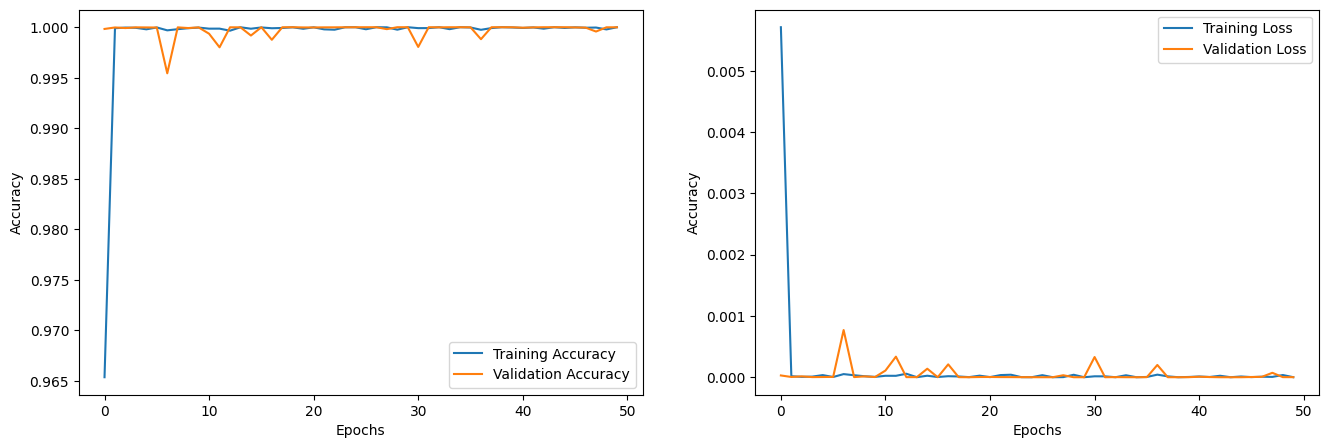

In [24]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

# Plot Training and Validation Loss
plt.subplot(1,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Loss', 'Validation Loss'])

## E. Evaluation and Prediction

In [25]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss :.5f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

32/32 [==============================] - 0s 5ms/step - loss: 1.0507e-06 - accuracy: 1.0000
Test Loss: 0.00000
Test Accuracy: 99.99935%


In [28]:
# Prediction on test dataset
y_predicted = model.predict(X_test)

32/32 [==============================] - 0s 4ms/step


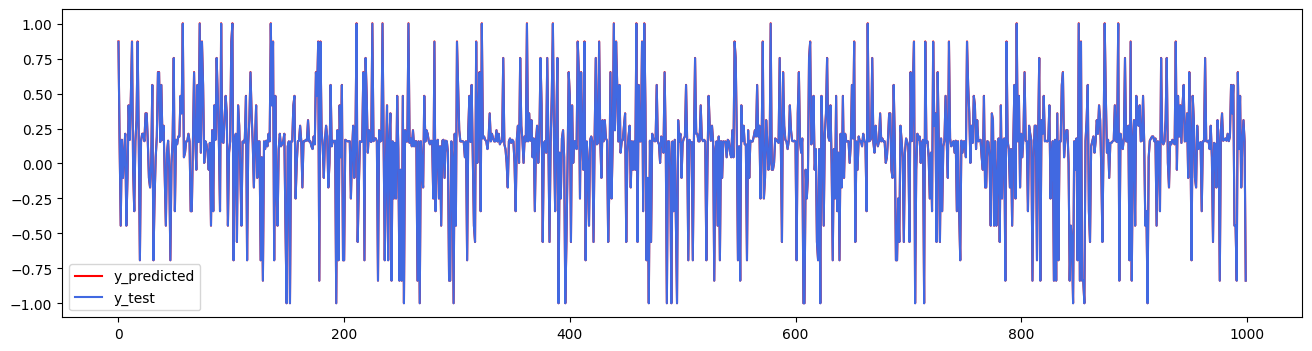

In [47]:
plt.figure(figsize=(16, 4))
plt.plot(y_predicted, label = "y_predicted", color='red')
plt.plot(y_test, label="y_test", color='royalblue')
plt.legend()
plt.show()